In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df1 = pd.read_csv("../data/connection_2017.csv", sep=';')
df2 = pd.read_csv("../data/connection_2018.csv", sep=';')
df3 = pd.read_csv("../data/connection_2019.csv", sep=';')

In [23]:
df1['BTR1'] = pd.to_datetime(df1['BTR1'])
df1['ATD1'] = pd.to_datetime(df1['ATD1'])
df1['ATU1'] = pd.to_datetime(df1['ATU1'])
df1['BTR2'] = pd.to_datetime(df1['BTR2'])
df1['ATD2'] = pd.to_datetime(df1['ATD2'])
df1['ATU2'] = pd.to_datetime(df1['ATU2'])

In [11]:
df1.isna().sum() / len(df1)

EVENT_C                 0.000000
CNTR_STATUS_C           0.000000
DISC_PORT1_C            0.038594
LOAD_PORT_C             0.035484
ABBR_VESSEL_M1          0.000000
BTR1                    0.000000
ATD1                    0.000000
ATU1                    0.000000
LINE_C1_GROUP           0.000000
SERVICE_C1              0.000000
SERVICE_TYPE_DESC_X1    0.157289
DIRECTION_C1            0.000000
CONSORTIUM_C1           0.266797
CAPACITY1               0.000000
ABBR_VESSEL_M2          0.095608
BTR2                    0.000000
ATD2                    0.000000
ATU2                    0.000000
LINE_C2_GROUP           0.097291
SERVICE_C2              0.097291
SERVICE_TYPE_DESC_X2    0.239979
DIRECTION_C2            0.097391
CONSORTIUM_C2           0.343968
CAPACITY2               0.097296
DERIVED_CNTR_PURP_C     0.000000
OPR_GROUP_C             0.000000
SUMOFBOX_Q              0.000000
SUMOFTEU_Q              0.000000
dtype: float64

In [15]:
# EVENT_C # CNTR_STATUS_C #SUMOFTEU_Q

<AxesSubplot:xlabel='BTR1'>

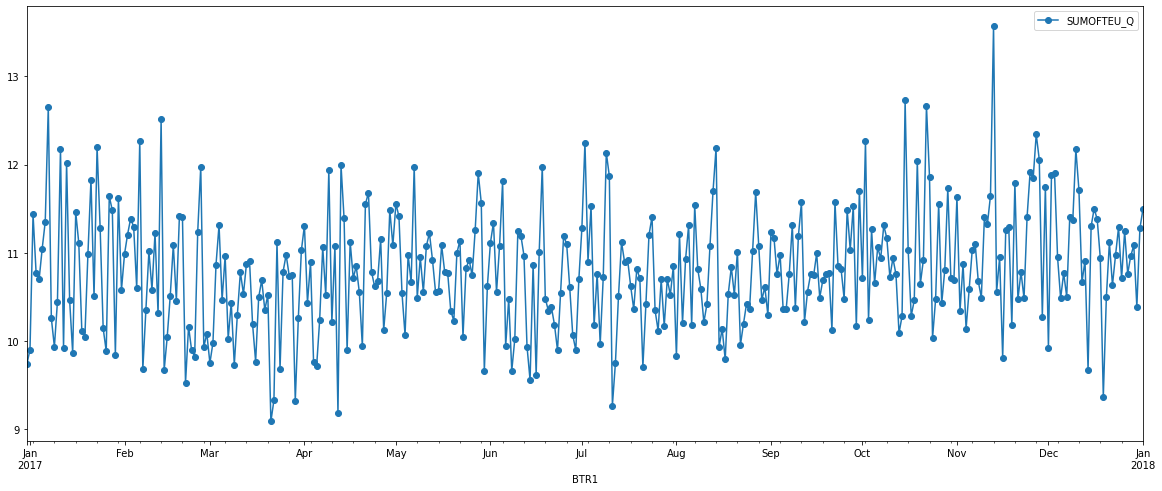

In [41]:

df1.set_index('BTR1')[['SUMOFTEU_Q']].resample("D").mean().plot(style="-o", figsize=(20, 8))

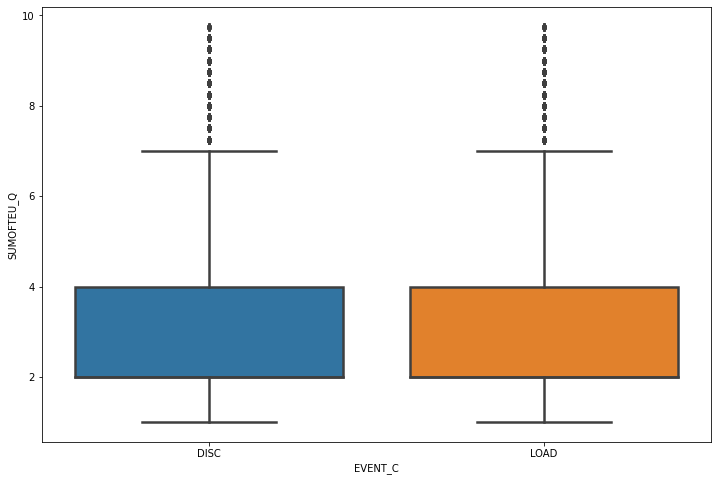

In [19]:
df1_ajdusted = df1[(df1['SUMOFTEU_Q'] < df1['SUMOFTEU_Q'].quantile(0.75)) & (df1['SUMOFTEU_Q'] > 0)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax = sns.boxplot(x="EVENT_C", y="SUMOFTEU_Q",
                 data=df1_ajdusted, linewidth=2.5)

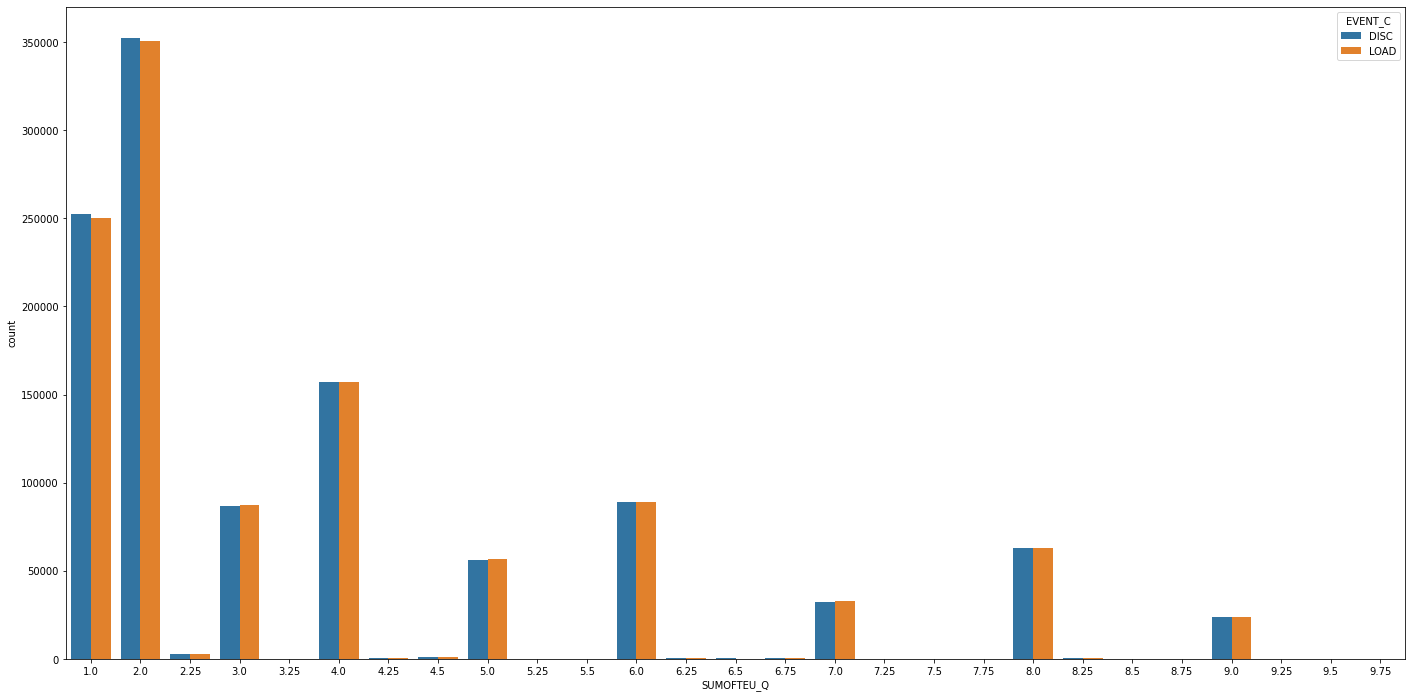

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,12))
cp = sns.countplot(x="SUMOFTEU_Q",
                   hue="EVENT_C",
                   data=df1_ajdusted
                  )

/Users/esther/Desktop/PSA NUS Challenge/psa-unboxed/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


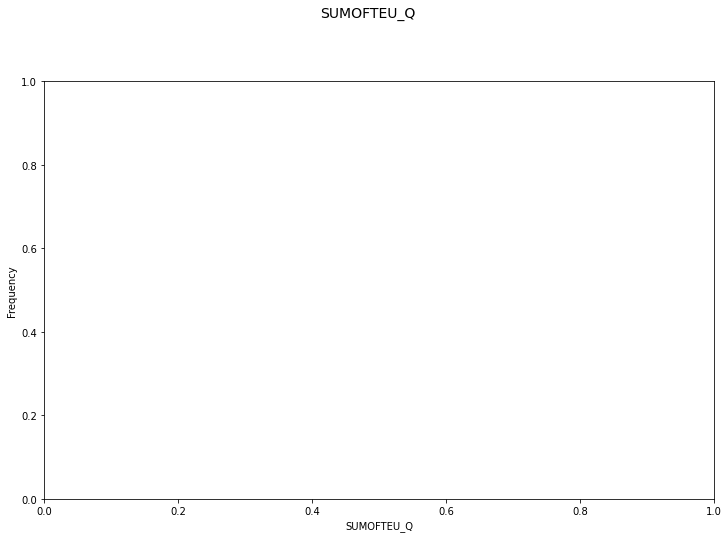

In [44]:
fig = plt.figure(figsize = (12, 8))
title = fig.suptitle("SUMOFTEU_Q", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("SUMOFTEU_Q")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(df1_ajdusted, hue="EVENT_C")
g.map(sns.distplot,"SUMOFTEU_Q", kde=False, bins=50, ax=ax)
#ax.legend(title='')
plt.close(2)